<a href="https://colab.research.google.com/github/YanaiA/deep-yanai/blob/master/gpt/karpathy_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

train_ds = tfds.as_dataframe(tfds.load(name='tiny_shakespeare', split='train'))
val_ds = tfds.as_dataframe(tfds.load(name='tiny_shakespeare', split='validation'))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/1.0.0.incompleteMODRHY/tiny_shakespeare-train.tfrecord*..…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/1.0.0.incompleteMODRHY/tiny_shakespeare-validation.tfreco…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/1.0.0.incompleteMODRHY/tiny_shakespeare-test.tfrecord*...…

Dataset tiny_shakespeare downloaded and prepared to /root/tensorflow_datasets/tiny_shakespeare/1.0.0. Subsequent calls will reuse this data.


In [2]:

# lengths = [len(dataset[x]) for x in ['train', 'validation', 'test']]
# print(f"lengths of dataset is {lengths}")

train_txt = train_ds['text'].to_list()[0].decode("utf-8")
print(train_txt[:1000])
val_txt = val_ds['text'].to_list()[0].decode("utf-8")


First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [3]:
chars = sorted(list(set(train_txt)))
vocab_size = len(chars)
print(''.join(chars))


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


In [4]:
stoi = {s:i for i, s in enumerate(chars)}
itos = {i:s for i, s in enumerate(chars)}
encode = lambda str:  [stoi[ch] for ch in str]
decode = lambda arr: ''.join([itos[i] for i in arr])

# encoders alternatives: tiktoken (chat-gpt), SentencePiece (google)

print(encode("hello world!"))
print(decode(encode("hello world!")))

[46, 43, 50, 50, 53, 1, 61, 53, 56, 50, 42, 2]
hello world!


In [5]:
import torch
train_data = torch.tensor(encode(train_txt), dtype=torch.long)
print(train_data[:1000])
val_data = torch.tensor(encode(val_txt), dtype=torch.long)

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
        47, 59, 57,  1, 47, 57,  1, 41, 

In [6]:
block_size = 8
x = train_data[:block_size*2]
y = train_data[1:block_size*2+1]
for t in range(block_size*2):
    context = x[max(0,t-block_size+1):t+1]
    target = y[t]
    print(f'when context is {context}, target is {target}')

when context is tensor([18]), target is 47
when context is tensor([18, 47]), target is 56
when context is tensor([18, 47, 56]), target is 57
when context is tensor([18, 47, 56, 57]), target is 58
when context is tensor([18, 47, 56, 57, 58]), target is 1
when context is tensor([18, 47, 56, 57, 58,  1]), target is 15
when context is tensor([18, 47, 56, 57, 58,  1, 15]), target is 47
when context is tensor([18, 47, 56, 57, 58,  1, 15, 47]), target is 58
when context is tensor([47, 56, 57, 58,  1, 15, 47, 58]), target is 47
when context is tensor([56, 57, 58,  1, 15, 47, 58, 47]), target is 64
when context is tensor([57, 58,  1, 15, 47, 58, 47, 64]), target is 43
when context is tensor([58,  1, 15, 47, 58, 47, 64, 43]), target is 52
when context is tensor([ 1, 15, 47, 58, 47, 64, 43, 52]), target is 10
when context is tensor([15, 47, 58, 47, 64, 43, 52, 10]), target is 0
when context is tensor([47, 58, 47, 64, 43, 52, 10,  0]), target is 14
when context is tensor([58, 47, 64, 43, 52, 10,  

In [7]:
batch_size = 4
torch.manual_seed(0)

def get_batch(split):
    data = train_data if split == 'train' else val_data
    batch_indexes = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in batch_indexes])
    y = torch.stack([data[i+1:i+block_size+1] for i in batch_indexes])
    return x, y

x_batch, y_batch = get_batch('train')
print(x_batch)
print(y_batch)

tensor([[46, 43,  1, 45, 47, 60, 43, 57],
        [51,  1, 58, 46, 43,  1, 63, 53],
        [39, 50, 50,  1, 63, 53, 59,  1],
        [53, 61, 52,  1, 57, 53, 59, 50]])
tensor([[43,  1, 45, 47, 60, 43, 57,  1],
        [ 1, 58, 46, 43,  1, 63, 53, 59],
        [50, 50,  1, 63, 53, 59,  1, 46],
        [61, 52,  1, 57, 53, 59, 50,  1]])


In [22]:
import torch.nn as nn
from torch.nn import functional as F

class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size) -> None:
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
    
    def forward(self, inputs, targets=None):
        # inputs & targets are [B=batch,T=time=block_size]
        logits = self.token_embedding_table(inputs)   # (B, T, C=channels=vocab_size)

        #reshape for cross-entrooy
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits_reshaped = logits.view(B*T, C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(logits_reshaped, targets_reshaped)

        return logits, loss

    def generate(self, inputs, new_tokens):
        outputs = inputs
        for _ in range(new_tokens):
            logits, _ = self(inputs)
            logits = logits[:, -1, :]   # take logits of last time step => [B, C]
            probs = F.softmax(logits, dim=-1)
            predictions = torch.multinomial(probs, num_samples=1)  # sample from probabilities => [B, 1]
            outputs = torch.cat((outputs, predictions), dim=1)  # [B, T+1]
        return outputs

        
model = BigramLanguageModel(vocab_size)
logits, loss = model(x_batch, y_batch)
print(loss)

simple_inputs = torch.zeros((1, 1), dtype=torch.long)
generated_string = model.generate(simple_inputs, 100)[0]  # 0 - take first (and only) batch
print(decode(generated_string.tolist()))



tensor(4.7946, grad_fn=<NllLossBackward0>)

f3r!!
.gO.gA gygbKhH!!.OrlS.Hlr,!l!!gQhOBHs?l :QXhQ,n.q!c$ZM.OAF..zVu$!:lh!$JJuSvJg!$nH,n$.s;sX?. u$



CGATaTNNTDSU

CQAIAGT

YFYAAEQ

NFwOWA
TCFT
VQtTTj

WHKEDB
EPTAJT

lTAH
AD
WNCIAB
Q
HIWSWHI3AAN
IIwI


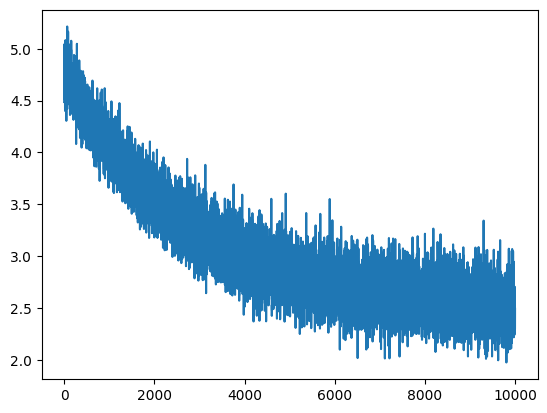

In [31]:
model = BigramLanguageModel(vocab_size)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
losses = []
for step in range(10000):
    xb, yb = get_batch('train')
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

from matplotlib import pyplot
pyplot.plot(losses)

generated_string = model.generate(simple_inputs, 100)[0]  # 0 - take first (and only) batch
print(decode(generated_string.tolist()))